In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

0   1   2   3   4   5   6   7   8   9   ...  31  32  33  34  35  \
ability       0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   
abstract      0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   
academic      0   0   0   0   0   0   0   0   0   0  ...   1   1   0   0   0   
according     0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   
achievement   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   

             36  37  38  39  40  
ability       0   0   0   0   0  
abstract      0   0   0   0   0  
academic      0   0   0   0   0  
according     0   0   0   0   0  
achievement   0   0   0   0   0  

[5 rows x 41 columns]

In [2]:
# Find the top 30 words found in each document
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('morning', 1),
  ('good', 1),
  ('production', 0),
  ('principle', 0),
  ('privately', 0),
  ('probably', 0),
  ('problem', 0),
  ('process', 0),
  ('produce', 0),
  ('ability', 0),
  ('rachel', 0),
  ('professor', 0),
  ('profoundly', 0),
  ('progressively', 0),
  ('prompted', 0),
  ('protracted', 0),
  ('public', 0),
  ('purpose', 0),
  ('previous', 0),
  ('pretty', 0),
  ('presentation', 0),
  ('prepared', 0),
  ('phone', 0),
  ('picasso', 0),
  ('picture', 0),
  ('pin', 0),
  ('place', 0),
  ('plane', 0),
  ('planet', 0),
  ('play', 0)],
 1: [('nt', 1),
  ('great', 1),
  ('laughter', 1),
  ('ability', 0),
  ('principle', 0),
  ('privately', 0),
  ('probably', 0),
  ('problem', 0),
  ('process', 0),
  ('produce', 0),
  ('pretty', 0),
  ('production', 0),
  ('professor', 0),
  ('profoundly', 0),
  ('progressively', 0),
  ('prompted', 0),
  ('protracted', 0),
  ('public', 0),
  ('previous', 0),
  ('presentation', 0),
  ('quote', 0),
  ('prepared', 0),
  ('phone', 0),
  ('picasso

In [3]:
# Print the top 15 words found in each document
for sentence, top_words in top_dict.items():
    print(sentence)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

0
morning, good, production, principle, privately, probably, problem, process, produce, ability, rachel, professor, profoundly, progressively
---
1
nt, great, laughter, ability, principle, privately, probably, problem, process, produce, pretty, production, professor, profoundly
---
2
ve, idea, education, relevant, thing, people, nt, presentation, want, happen, theme, play, leaving, away
---
3
say, laughter, party, work, education, asked, dinner, know, somebody, interesting, strange, frankly, actually, curiously
---
4
education, work, run, face, god, oh, blood, know, like, say, meet, profoundly, problem, process
---
5
laughter, education, week, pin, people, deep, thing, night, ask, wall, right, ability, process, probably
---
6
think, child, year, meant, extraordinary, education, like, capacity, nt, parade, time, partly, innovation, mean
---
7
drawing, laughter, education, teacher, creativity, said, talent, exceptional, talk, contention, want, lesson, applause, girl
---
8
said, laughter,

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['morning',
 'good',
 'production',
 'principle',
 'privately',
 'probably',
 'problem',
 'process',
 'produce',
 'ability',
 'rachel',
 'professor',
 'profoundly',
 'progressively',
 'prompted',
 'protracted',
 'public',
 'purpose',
 'previous',
 'pretty',
 'presentation',
 'prepared',
 'phone',
 'picasso',
 'picture',
 'pin',
 'place',
 'plane',
 'planet',
 'play',
 'nt',
 'great',
 'laughter',
 'ability',
 'principle',
 'privately',
 'probably',
 'problem',
 'process',
 'produce',
 'pretty',
 'production',
 'professor',
 'profoundly',
 'progressively',
 'prompted',
 'protracted',
 'public',
 'previous',
 'presentation',
 'quote',
 'prepared',
 'phone',
 'picasso',
 'picture',
 'pin',
 'place',
 'plane',
 'planet',
 'play',
 've',
 'idea',
 'education',
 'relevant',
 'thing',
 'people',
 'nt',
 'presentation',
 'want',
 'happen',
 'theme',
 'play',
 'leaving',
 'away',
 'future',
 'range',
 'laughter',
 'creativity',
 'variety',
 'human',
 'just',
 'second',
 'evidence',
 'place',
 '

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('production', 29),
 ('produce', 29),
 ('professor', 29),
 ('process', 28),
 ('profoundly', 28),
 ('problem', 27),
 ('prompted', 27),
 ('progressively', 26),
 ('probably', 25),
 ('principle', 23),
 ('privately', 22),
 ('protracted', 22),
 ('ability', 21),
 ('public', 21),
 ('place', 21),
 ('previous', 20),
 ('pretty', 19),
 ('presentation', 19),
 ('pin', 18),
 ('plane', 18),
 ('nt', 18),
 ('laughter', 18),
 ('picasso', 17),
 ('picture', 17),
 ('prepared', 15),
 ('planet', 15),
 ('phone', 13),
 ('education', 11),
 ('thing', 11),
 ('think', 11),
 ('said', 11),
 ('know', 10),
 ('purpose', 9),
 ('play', 9),
 ('quote', 9),
 ('people', 9),
 ('really', 7),
 ('come', 7),
 ('predicated', 7),
 ('philosophical', 7),
 ('kid', 6),
 ('rachel', 5),
 ('say', 5),
 ('like', 5),
 ('child', 5),
 ('want', 4),
 ('creativity', 4),
 ('human', 4),
 ('time', 4),
 ('shakespeare', 4),
 ('school', 4),
 ('gillian', 4),
 ('idea', 3),
 ('future', 3),
 ('just', 3),
 ('actually', 3),
 ('work', 3),
 ('somebody', 3),
 (

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['production',
 'produce',
 'professor',
 'process',
 'profoundly',
 'problem',
 'prompted',
 'progressively',
 'probably',
 'principle',
 'privately',
 'protracted',
 'ability',
 'public',
 'place',
 'previous',
 'pretty',
 'presentation',
 'pin',
 'plane',
 'nt',
 'laughter',
 'picasso',
 'picture',
 'prepared',
 'planet',
 'phone',
 'education',
 'thing',
 'think',
 'said',
 'know',
 'purpose',
 'play',
 'quote',
 'people',
 'really',
 'come',
 'predicated',
 'philosophical']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

ValueError: We need at least 1 word to plot a word cloud, got 0.

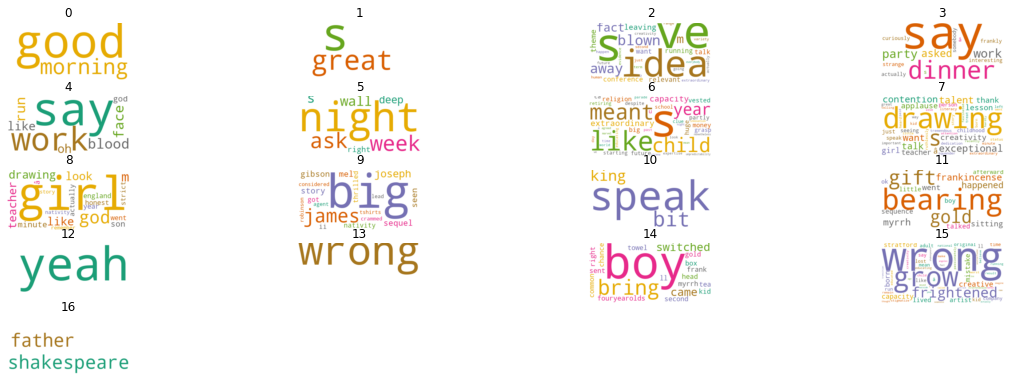

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 16]
id = []
for comedian, top_words in top_dict.items():
    id.append(comedian)
# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(12, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(id[index])
    
plt.show()

**Do some more task here**